# **KAU Deep Learning (Spring 2025)**
### Machine Learning Basics II with Scikit-Learn  

**NOTE**
Some descriptions & codes from the below resources:
1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.askpython.com/python/examples/principal-component-analysis
3. https://devopedia.org/principal-component-analysis
4. https://colab.research.google.com/github/andy6804tw/2021-13th-ironman/blob/main/11.SVM/11.1.SVM(Classification-iris).ipynb#scrollTo=vZLBnRyHxCHK
---


# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

##1. Gradient Descent

* Batch Gradient Descent (= Gradient Descent = Full Gradient Descent)
* Stochastic Gradient Descent
* Mini-batch Gradient Descent

- Recap: Linear regression using the Normal Equation
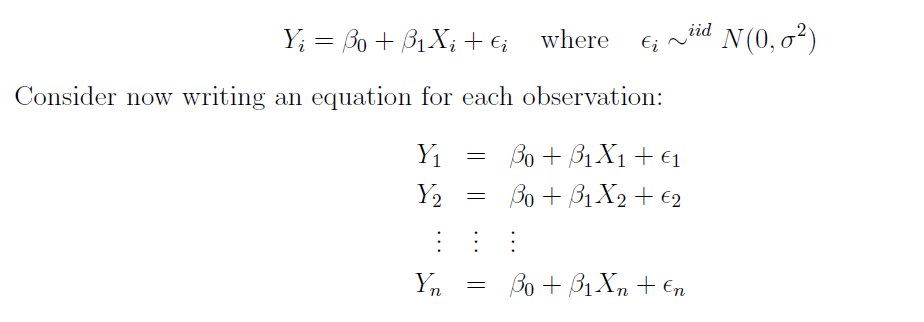

shape of X:  (100, 1)
shape of y:  (100, 1)


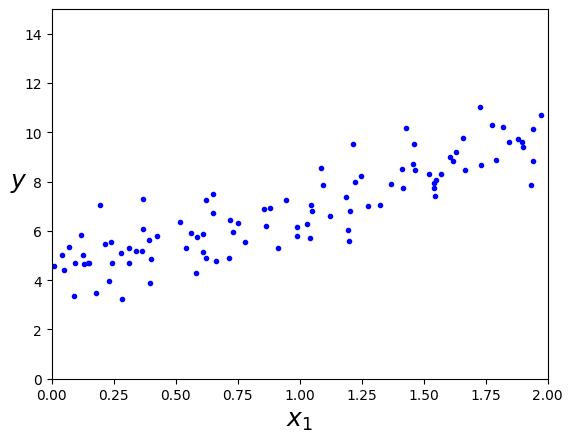

In [ ]:
import numpy as np

## theta0 = 4,  theta1 = 3
## Input : uniform(0,2)
theta_gt = np.array( [ 4, 3 ] ) # 정답을 미리 정해놓고 시작. 4:절편 3: 기울기

X = 2 * np.random.rand(100, 1)   # X ~ Uniform (0, 2)
y = theta_gt[0] + theta_gt[1] * X + np.random.randn(100, 1) #  직선위에 랜덤으로 데이터를 뿌림

print('shape of X: ', X.shape)
print('shape of y: ', y.shape)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

shape of X_c:  (100, 2)
theta_best:
[[4.21509616]
 [2.77011339]]
value of y_predict:
 [[4.21509616]
 [9.75532293]]


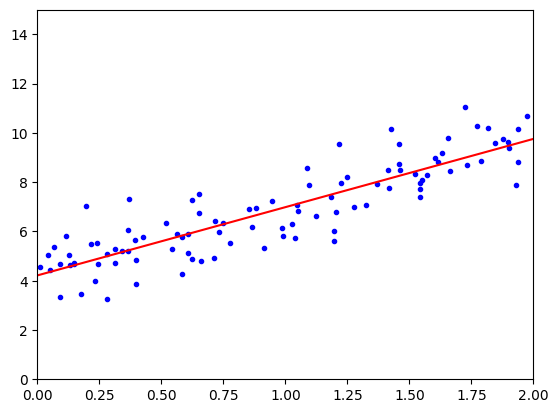

In [ ]:
####### YOUR CODE HERE #######
# Solve the linear regression problem again!!
X_c = np.c_[np.ones((100, 1)),X] # 100 x 2
print('shape of X_c: ', X_c.shape)

theta_best = np.linalg.inv(X_c.T @ X_c) @ X_c.T @ y # 선형회귀 솔루션 암기!!!!!
####### YOUR CODE HERE #######
print(f"theta_best:\n{theta_best}") # 4,3이 정답

# Let's draw your prediction (line)
L_pt = np.array([0, 2]) # x 범위
L_pt_c = np.c_[np.ones((2, 1)), L_pt] # 2x2

y_predict = L_pt_c @ theta_best
print('value of y_predict:\n', y_predict)

# Drawing
plt.plot(X, y, "b.", L_pt, y_predict, 'r', label='Prediction')
plt.axis([0, 2, 0, 15])
plt.show()

### Linear regression using batch gradient descent (full gradient descent)

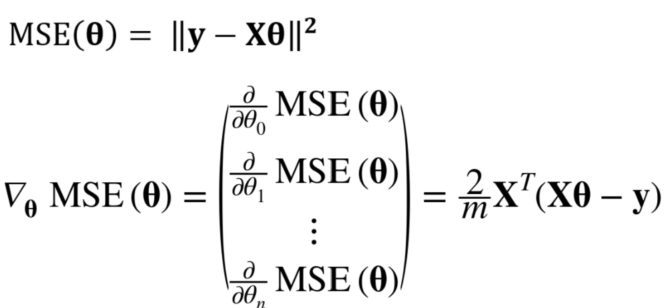

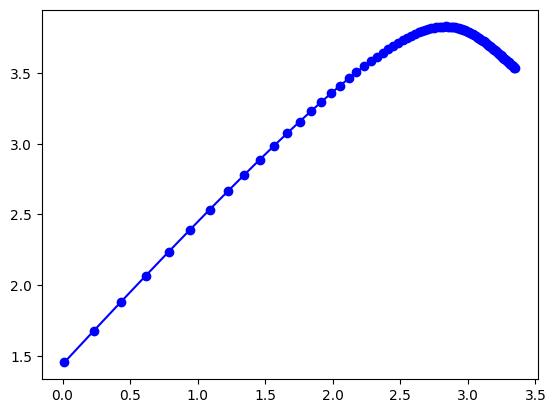

theta first value: 
 [[0.01300189]
 [1.45353408]]
theta last value: 
 [[3.35032687]
 [3.5327517 ]]


In [ ]:
eta = 0.02  # learning rate
n_iterations = 100
m = 100 # num of samples
theta_path = []

X_c = np.c_[np.ones((100, 1)), X] # 100x2
theta = np.random.randn(2,1)  # 2x1 random initialization--->초기값을 랜덤하게 둬도 잘 작동함
theta_path.append(theta)

####### YOUR CODE HERE #######
# Gradient descent for theta
for iteration in range(n_iterations) :
  delta_theta = (2/m)*X_c.T @ (X_c @ theta - y) # 2x1
  theta = theta - eta * delta_theta # 2x1
  theta_path.append(theta)

theta_path_np = np.array(theta_path)
plt.plot(theta_path_np[:,0], theta_path_np[:,1],'b-o')
plt.show()

# 정답 (4,3)
print('theta first value: \n',theta_path_np[0])
print('theta last value: \n',theta_path_np[-1])


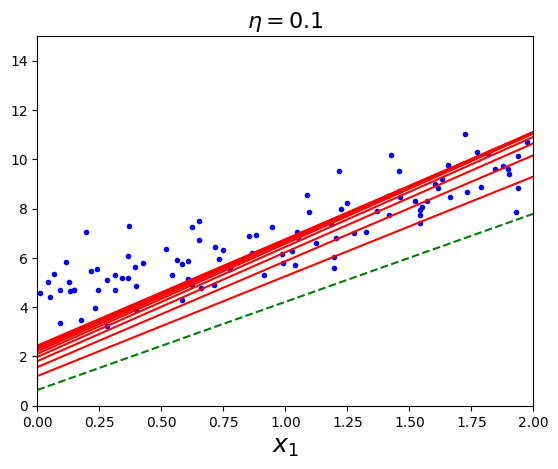

In [ ]:
# Let's analyze the Gradient descent method
# 모든 데이터를 이용해서 경사하강법 진행
def gradient_descent_anlysis( X, y, theta, eta ):

    theta_path = []
    plt.plot(X, y, "b.")

    n_iterations = 100
    m = np.size(y)

    X_c = np.c_[ np.ones((m,1)), X ]
    L_pt = np.array([0, 2])
    L_pt_c = np.c_[ np.ones((2,1)), L_pt ]

    for iteration in range(n_iterations) :
        gradients = 2/m * X_c.T @ ( X_c @ theta - y )
        theta = theta - eta * gradients
        theta_path.append(theta)

        y_predict = L_pt_c @ theta

        if iteration == 0 :
          plt.plot(L_pt, y_predict, 'g--') # 초기값
        elif iteration < 10 :
          plt.plot(L_pt, y_predict, 'r') # 10번째 까지만 라인을 그려서 진행상황 파악

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

    return theta_path

theta_path_gd = gradient_descent_anlysis( X, y, np.random.randn(2,1), eta=0.1)

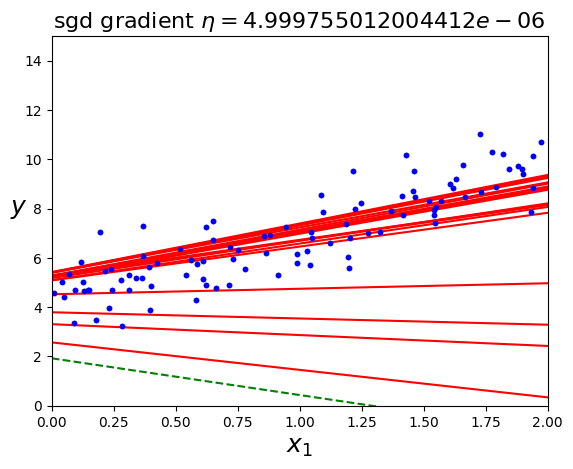

In [ ]:
### Linear regression using stochastic gradient descent (using a single sample to compute the gradient)
# 확률적 경사하강법은 모든 데이터를 사용하는 것이 아니라 전체 데이터로 일부만 사용
# 실제 현업에서 자주 사용하는 방법. 속도가 빠른 것이 장점!!
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

theta_path_sgd=[]

def sgd_anlysis( X, y, theta, eta ):

####### YOUR CODE HERE #######
    n_iterations = 1000
    plt.plot(X, y, "b.")

    m = np.size(y)
    n_iterations = 100*m

    X_c = np.c_[np.ones((m,1)),X]
    L_pt = np.array([0,2])
    L_pt_c=np.c_[np.ones((2,1)),L_pt]

    for epoch in range(n_iterations):
        # shuffle_idx = np.random.permutation(m) # 이게 더 좋은 방

        for i in range(m) :
            if epoch == 0 and i < 20:
                y_predict = L_pt_c.dot(theta)
                style = "r-" if i > 0 else "g--" # 초기값은 빨간색 직선 그 다음부터는 파란색으로 피팅
                plt.plot(L_pt, y_predict, style)

            random_idx = np.random.randint(m) #0~99중 랜덤한 숫자 한개를 뽑음. 랜덤하지 않으면 순서가 생겨서 알고리즘이 순서를 학습하게 됨
            '''
            X_c = X_c[shuffle_idx]
            y = y[shuffle_idx]
            '''
            xi=X_c[random_idx:random_idx+1,:] # X_c_p =100x1 차원이 내려가는 것을 방지하여 끝부분 index에 +1을 해준다??
            yi=y[random_idx:random_idx+1]

            #random_idx=np.random.randint(m) #0~99중 랜덤한 숫자 한개를 뽑음

            # x=X_c[i:i+1,:] #X_c_p =100x1
            # yi=y[i]


            gradients = 2*xi.T @ ((xi @ theta) -yi)
            eta = eta = learning_schedule(epoch * m + i)
            theta = theta-eta*gradients
            theta_path_sgd.append(theta)
            y_predict = L_pt_c @ theta

    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"sgd gradient $\eta = {}$".format(eta), fontsize=16)
    plt.show()
    return theta_path

theta_path_sgd = sgd_anlysis( X, y, np.random.randn(2,1), eta=0.01)


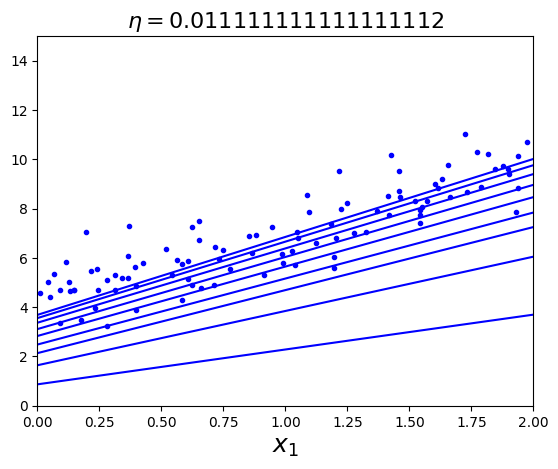

In [ ]:
### Linear regression using mini-batch gradient descent (using some samples to compute the gradient)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd=[]

def mgd_anlysis( X, y, theta, eta ):

####### YOUR CODE HERE #######
    plt.plot(X, y, "b.")
    b_size=5

    m = np.size(y)
    n_iterations = 100//b_size
    t=0
    X_b = np.c_[np.ones((m,1)),X] # Define and initialize X_b
    X_new = np.array([0, 2])  # Define X_new for prediction line
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term to X_new

    #indx=np.random.permutation(5) #랜덤하게 순서를 바꿈
    for epoch in range(n_iterations) :
        #idx=np.random.randint(m-b_size) #0~99중 랜덤한 숫자 한개를 뽑음

        shuffle_idx=np.random.permutation(m)
        X_b_shuffle=X_b[shuffle_idx] #1x2
        y_shuffle=y[shuffle_idx] #1x2

        for i in range(0, n_iterations):
            if epoch == 0 and i < 10:
                y_predict = X_new_b @ theta
                style = "b-" if i > 0 else "r--"
                plt.plot(X_new, y_predict, style)
            t+=1
            xi = X_b_shuffle[i:i+b_size]
            yi = y_shuffle[i:i+b_size]

            gradients = 2/b_size *xi.T @ ((xi @ theta)-yi) # mini_batch 사이즈로 나누는 것 주의!!!
            eta=learning_schedule(t)
            theta = theta-eta*gradients
            theta_path_mgd.append(theta)

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


    return theta_path

theta_path_mgd = mgd_anlysis( X, y, np.random.randn(2,1), eta=0.1)

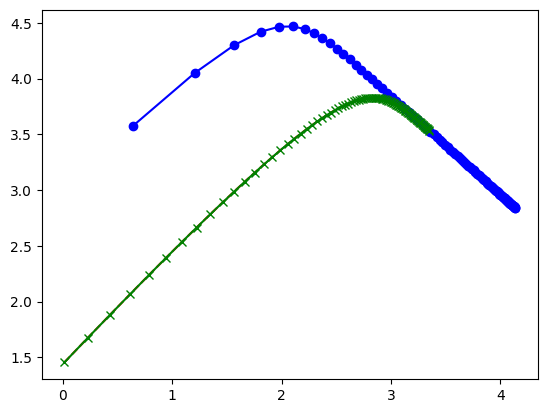

In [ ]:
theta_path_gd = np.array(theta_path_gd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.plot(theta_path_gd[:,0], theta_path_gd[:,1],'b-o')
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1],'r--')
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1],'g-x')

plt.show()

In [ ]:
# sgd 함수--학습률 함수 적용 버전
def stochastic_gradien_descent(X, y, initial_theta, n_iterations):
    m = np.size(y) # 샘플 수
    theta = initial_theta
    mse_history = []
    accuracy_history = [] #theta-theta_gt간 정확도
    theta_gt = np.array([1, 2, 3, 4, 0]).reshape(5, 1)  # 마지막 0은 상수항
    print('학습률 변화 추이\n')
    for epoch in range(n_iterations):
        for i in range(m):
            random_idx = np.random.randint(m) # 0~999중 랜덤한 숫자 선택
            xi = X[random_idx:random_idx+1]
            yi = y[random_idx:random_idx+1]

            gradients = 2 * xi.T @ ((xi @ theta) - yi)
            eta = learning_schedule(epoch * m + i) # epoch이 진행될 수록 학습률이 감소하는 방식
            theta = theta - eta * gradients

        if epoch % 10 == 0:  # 10번째 샘플마다 학습률 출력
            print(f"Epoch {epoch}, eta = {eta:.6f}")
        mse = np.mean((xi@theta - yi)**2)
        mse_history.append(mse)

        # theta와 theta_gt 간 accuracy 계산. 상대오차 계산 방식
        relative_error = np.zeros_like(theta) # 상대오차 저장 배열 초기화
        for j in range(len(theta)): # theta길이만큼 반복
            if abs(theta_gt[j]) < 1e-5:  # theta_gt가 0에 가까운 경우에는 해당 theta[j]를 ground truth 로 삼는다.
                relative_error[j] = abs(theta[j])  # theta가 0에 가까운 정도를 오차로 사용
            else:
                relative_error[j] = abs(theta[j] - theta_gt[j]) / abs(theta_gt[j])

        # 정확도 계산: 1 - 상대 오차 (0~1 사이), 100을 곱해 퍼센트로 변환
        # 각 theta별 정확도를 평균내서 계산
        # 상대오차가 1이상이면 정확도가 음수가 되므로 최솟값은 0으로 제한
        accuracy_per_element = np.maximum(0, 1 - relative_error) * 100 # 0이하일 경우 0을 반환하도록 np.maximum 사용
        accuracy = np.mean(accuracy_per_element) # 전체 정확도: 요소별 정확도의 평균
        accuracy_history.append(accuracy)
        avg_mse=np.mean(mse_history)

    return theta, mse_history, avg_mse, accuracy_history